In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [10]:
# Load datasets
fitbit = pd.read_csv("../data/raw/daily_fitbit_sema_df_unprocessed.csv")
obesity = pd.read_csv("../data/raw/ObesityDataSet_raw_and_data_sinthetic.csv")

fitbit.head(), obesity.head()


(   Unnamed: 0                        id        date  nightly_temperature  \
 0           0  621e2e8e67b776a24055b564  2021-05-24            34.137687   
 1           1  621e2e8e67b776a24055b564  2021-05-25            33.794544   
 2           2  621e2e8e67b776a24055b564  2021-05-26            34.611011   
 3           3  621e2e8e67b776a24055b564  2021-05-27            34.408304   
 4           4  621e2e8e67b776a24055b564  2021-05-28            34.178922   
 
    nremhr    rmssd  spo2  full_sleep_breathing_rate  stress_score  \
 0  57.432   89.603   NaN                       14.8          78.0   
 1  57.681   94.303   NaN                       15.8          80.0   
 2  57.481  119.212   NaN                       14.6          84.0   
 3  57.493  111.709   NaN                       14.8          82.0   
 4  56.750  103.034   NaN                       15.2          81.0   
 
    sleep_points_percentage  exertion_points_percentage  \
 0                 0.833333                       0.675

In [11]:
print("Fitbit Data Info:")
fitbit.info()

print("\nObesity Data Info:")
obesity.info()



Fitbit Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 63 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        7410 non-null   int64  
 1   id                                7410 non-null   object 
 2   date                              7410 non-null   object 
 3   nightly_temperature               3359 non-null   float64
 4   nremhr                            2475 non-null   float64
 5   rmssd                             2475 non-null   float64
 6   spo2                              1270 non-null   float64
 7   full_sleep_breathing_rate         2495 non-null   float64
 8   stress_score                      1876 non-null   float64
 9   sleep_points_percentage           1876 non-null   float64
 10  exertion_points_percentage        1876 non-null   float64
 11  responsiveness_points_percentage  1876 non-null   f

In [12]:
# Compute BMI
obesity["BMI"] = obesity["Weight"] / (obesity["Height"] ** 2)

# Create binary obesity label
obesity["obesity_label"] = obesity["NObeyesdad"].apply(
    lambda x: 1 if "Obesity" in x else 0
)

# Keep only needed columns
obesity_clean = obesity[["Gender", "Age", "Height", "Weight", "BMI", "obesity_label"]]

obesity_clean.head()


,Gender,Age,Height,Weight,BMI,obesity_label
0,Female,21.0,1.62,64.0,24.386526,0
1,Female,21.0,1.52,56.0,24.238227,0
2,Male,23.0,1.80,77.0,23.765432,0
3,Male,27.0,1.80,87.0,26.851852,0
4,Male,22.0,1.78,89.8,28.342381,0


In [13]:
# Normalize column names
fitbit.columns = fitbit.columns.str.lower().str.strip()

# Convert sleep minutes → hours (if column exists)
if "total_minutes_asleep" in fitbit.columns:
    fitbit["sleep_hours"] = fitbit["total_minutes_asleep"] / 60

# Try to find heart rate column
possible_hr_cols = [c for c in fitbit.columns if "heart" in c]
possible_hr_cols


[]

In [14]:
columns_needed = [
    "date",
    "steps",
    "calories",
    "sleep_hours"
]

available = [c for c in columns_needed if c in fitbit.columns]

fitbit_clean = fitbit[available].copy()
fitbit_clean.head()


,date,steps,calories
0,2021-05-24,8833.0,2351.59
1,2021-05-25,9727.0,2332.08
2,2021-05-26,8253.0,2262.30
3,2021-05-27,9015.0,2325.10
4,2021-05-28,12949.0,2586.76


In [15]:
fitbit_clean["date"] = pd.to_datetime(fitbit_clean["date"], errors="coerce")
fitbit_clean = fitbit_clean.dropna(subset=["date"])
fitbit_clean.head()


,date,steps,calories
0,2021-05-24,8833.0,2351.59
1,2021-05-25,9727.0,2332.08
2,2021-05-26,8253.0,2262.30
3,2021-05-27,9015.0,2325.10
4,2021-05-28,12949.0,2586.76


In [16]:
print("Obesity dataset summary:")
display(obesity_clean.describe())

print("\nFitbit dataset summary:")
display(fitbit_clean.describe())


Obesity dataset summary:


,Age,Height,Weight,BMI,obesity_label
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,29.700159,0.460445
std,6.345968,0.093305,26.191172,8.011337,0.498551
min,14.000000,1.450000,39.000000,12.998685,0.000000
25%,19.947192,1.630000,65.473343,24.325802,0.000000
50%,22.777890,1.700499,83.000000,28.719089,0.000000
75%,26.000000,1.768464,107.430682,36.016501,1.000000
max,61.000000,1.980000,173.000000,50.811753,1.000000



Fitbit dataset summary:


,date,steps,calories
count,7410,4777.000000,6660.000000
mean,2021-09-13 05:17:32.307692288,8261.635964,2182.955429
min,2021-04-08 00:00:00,0.000000,0.690000
25%,2021-07-05 00:00:00,4461.000000,1669.470000
50%,2021-08-27 00:00:00,7420.000000,2073.600000
75%,2021-11-29 00:00:00,11046.000000,2579.765000
max,2022-01-22 00:00:00,43112.000000,8387.030000
std,NaN,5475.528891,704.189313


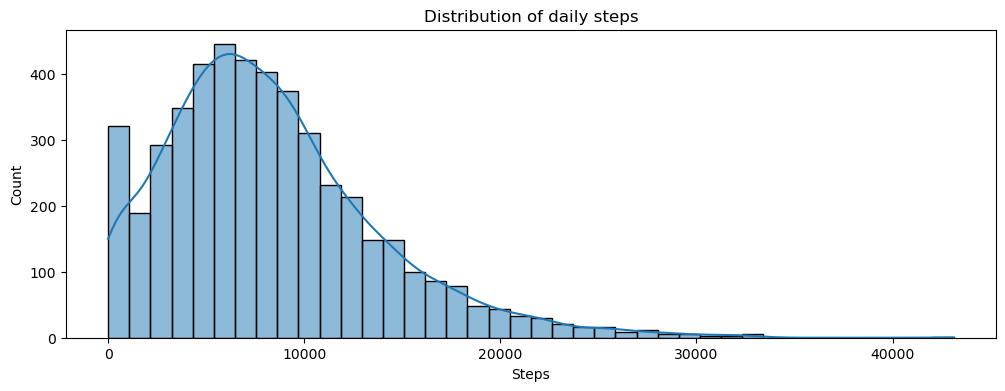

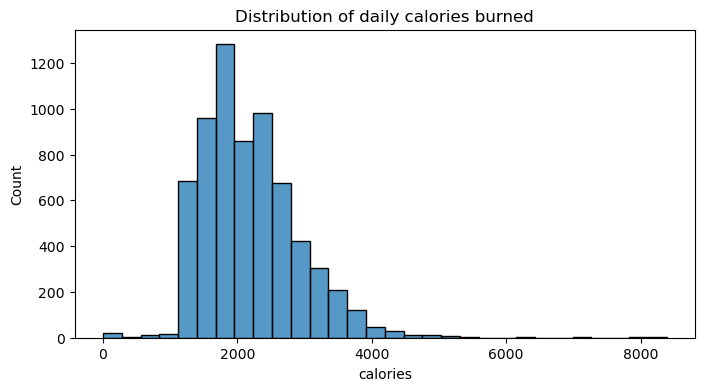

In [17]:
# Fitbit exploratory plots
plt.figure(figsize=(12,4))
if "steps" in fitbit_clean.columns:
    sns.histplot(fitbit_clean["steps"].dropna(), bins=40, kde=True)
    plt.title("Distribution of daily steps")
    plt.xlabel("Steps")
    plt.show()

if "sleep_hours" in fitbit_clean.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(fitbit_clean["sleep_hours"].dropna(), bins=20, kde=True)
    plt.title("Distribution of sleep hours")
    plt.xlabel("Sleep hours")
    plt.show()

if "calories" in fitbit_clean.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(fitbit_clean["calories"].dropna(), bins=30)
    plt.title("Distribution of daily calories burned")
    plt.show()


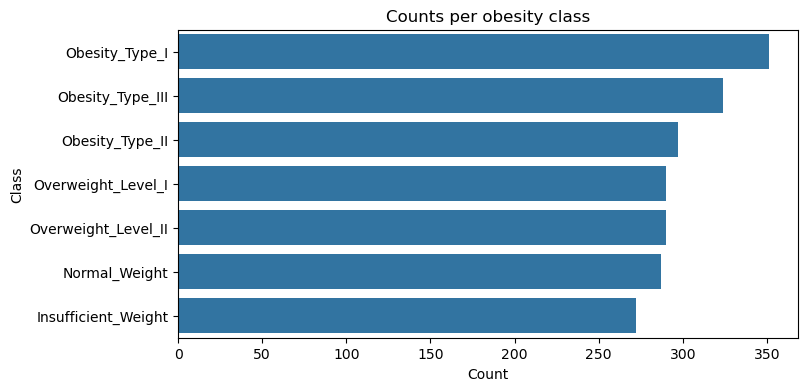

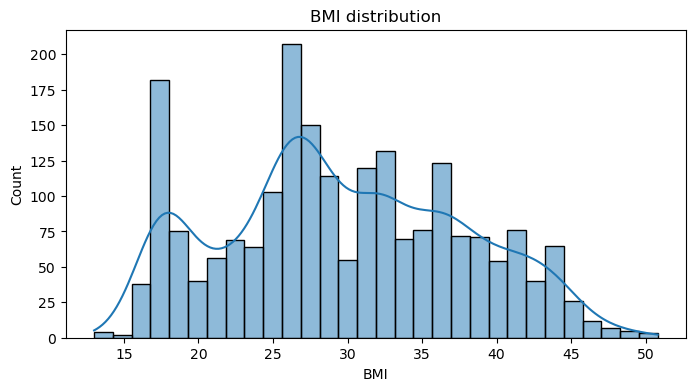

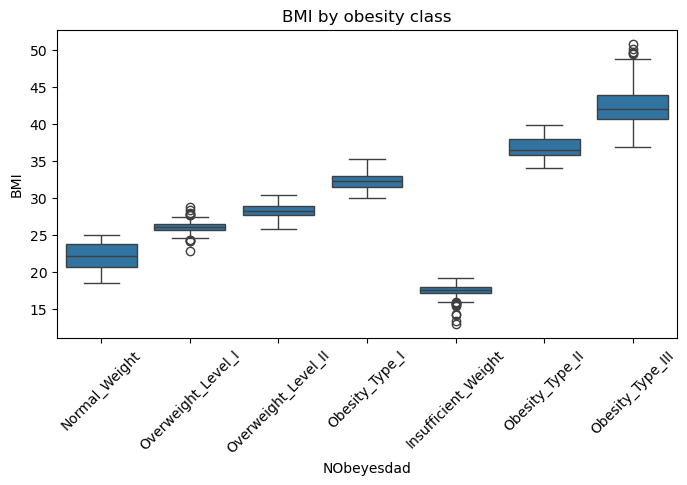

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(y=obesity["NObeyesdad"], order=obesity["NObeyesdad"].value_counts().index)
plt.title("Counts per obesity class")
plt.xlabel("Count")
plt.ylabel("Class")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(obesity["BMI"].dropna(), bins=30, kde=True)
plt.title("BMI distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x="NObeyesdad", y="BMI", data=obesity)
plt.xticks(rotation=45)
plt.title("BMI by obesity class")
plt.show()


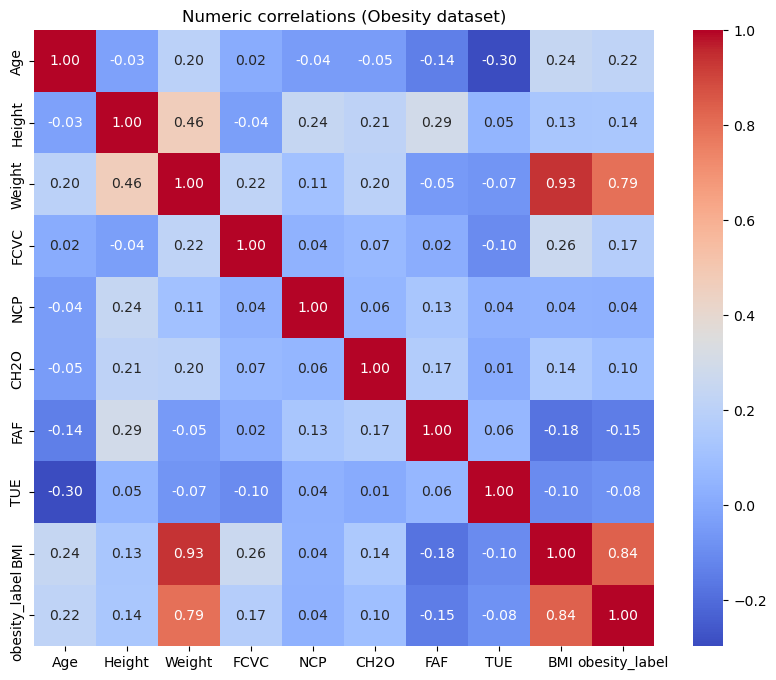

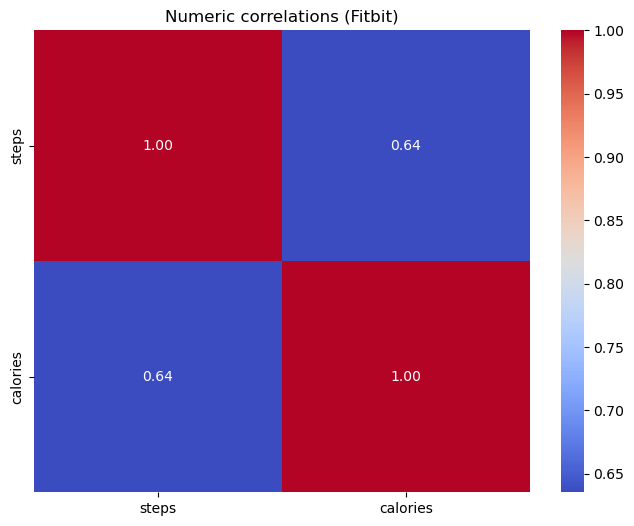

In [19]:
# Numeric correlation within obesity dataset
num_obs = obesity.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(num_obs.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Numeric correlations (Obesity dataset)")
plt.show()

# Numeric correlation within fitbit (if numeric columns exist)
num_fit = fitbit_clean.select_dtypes(include=[np.number])
if not num_fit.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(num_fit.corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Numeric correlations (Fitbit)")
    plt.show()


In [20]:
# Check for user_id columns
fitbit_ids = [c for c in fitbit.columns if "id" in c.lower() or "user" in c.lower()]
obesity_ids = [c for c in obesity.columns if "id" in c.lower() or "user" in c.lower()]

print("fitbit id-like cols:", fitbit_ids)
print("obesity id-like cols:", obesity_ids)

merged = None
if fitbit_ids and obesity_ids:
    # choose first id-like column for each
    fid = fitbit_ids[0]
    oid = obesity_ids[0]
    # aggregate fitbit per user (mean of numeric cols) then merge
    fit_agg = fitbit.groupby(fid).agg({c:"mean" for c in fitbit.select_dtypes(include=[np.number]).columns}).reset_index()
    merged = pd.merge(obesity, fit_agg, left_on=oid, right_on=fid, how="inner")
    print("Merged shape:", merged.shape)
else:
    print("No user-id found in both datasets → proceeding with obesity dataset modelling only.")


fitbit id-like cols: ['id']
obesity id-like cols: []
No user-id found in both datasets → proceeding with obesity dataset modelling only.


In [21]:
# Cell 13 — check available columns in obesity dataset
print("Columns in obesity dataset:")
for i, c in enumerate(obesity.columns):
    print(i+1, c)

# عرض أمثلة سريعة
obesity.head(5)


Columns in obesity dataset:
1 Age
2 Gender
3 Height
4 Weight
5 CALC
6 FAVC
7 FCVC
8 NCP
9 SCC
10 SMOKE
11 CH2O
12 family_history_with_overweight
13 FAF
14 TUE
15 CAEC
16 MTRANS
17 NObeyesdad
18 BMI
19 obesity_label


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,BMI,obesity_label
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight,24.386526,0
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,0
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight,23.765432,0
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I,26.851852,0
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,0


In [22]:
# Cell 14 — choose candidate features based on ACTUAL columns
candidate_features = [
    "Age","Gender","Height","Weight",
    "CALC","FAVC","FCVC","NCP","SCC","SMOKE","CH2O",
    "family_history_with_overweight","FAF","TUE","CAEC","MTRANS"
]

# خليه يختار المتوفر فقط (للتأكد)
available = [c for c in candidate_features if c in obesity.columns]
print("Using features:", available)

# إنشاء dataset للنمذجة
df_model = obesity[available + ["NObeyesdad"]].copy()

# binary label
df_model["obesity_label"] = df_model["NObeyesdad"].apply(lambda x: 1 if "Obesity" in x else 0)

print("Shape:", df_model.shape)
df_model.head()


Using features: ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS']
Shape: (2111, 18)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,obesity_label
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight,0
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight,0
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I,0
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0


In [23]:
# Cell 15 — preprocessing + train/test split + pipelines
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# X, y
X = df_model[available].copy()
y = df_model["obesity_label"].astype(int)

# تفريق الأعمدة العددية والفئوية
num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()
print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)

# Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Pipelines
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
cat_pipeline = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer([("num", num_pipeline, num_cols), ("cat", cat_pipeline, cat_cols)])


Numeric cols: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical cols: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']


In [24]:
# Cell 16 — train models and compare
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Logistic pipeline
pipe_log = Pipeline([("pre", preprocessor), ("clf", LogisticRegression(max_iter=1000))])
pipe_log.fit(X_train, y_train)
pred_log = pipe_log.predict(X_test)
prob_log = pipe_log.predict_proba(X_test)[:,1]

# RandomForest pipeline
pipe_rf = Pipeline([("pre", preprocessor), ("clf", RandomForestClassifier(n_estimators=200, random_state=42))])
pipe_rf.fit(X_train, y_train)
pred_rf = pipe_rf.predict(X_test)
prob_rf = pipe_rf.predict_proba(X_test)[:,1]

# Metrics
print("Logistic Regression")
print("Accuracy:", round(accuracy_score(y_test, pred_log), 3))
print("AUC:", round(roc_auc_score(y_test, prob_log), 3))
print(classification_report(y_test, pred_log))

print("\nRandom Forest")
print("Accuracy:", round(accuracy_score(y_test, pred_rf), 3))
print("AUC:", round(roc_auc_score(y_test, prob_rf), 3))
print(classification_report(y_test, pred_rf))


Logistic Regression
Accuracy: 0.991
AUC: 1.0
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       228
           1       0.99      0.99      0.99       195

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423


Random Forest
Accuracy: 0.986
AUC: 0.999
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       228
           1       0.99      0.98      0.98       195

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423



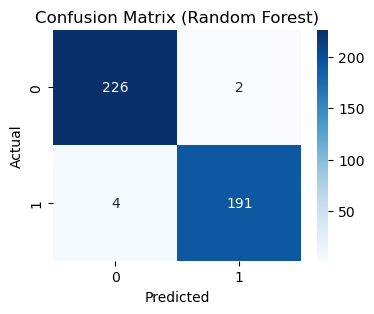

Best model chosen: LogisticRegression


In [25]:
# Cell 17 — confusion matrix and choose best model (we'll pick RF if better)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# confusion matrix for RF
cm = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# decide best model
# compare AUC
auc_log = roc_auc_score(y_test, prob_log)
auc_rf = roc_auc_score(y_test, prob_rf)
best_model = pipe_rf if auc_rf >= auc_log else pipe_log
print("Best model chosen:", "RandomForest" if best_model is pipe_rf else "LogisticRegression")


Best model is Logistic Regression — use coef_ for importance.


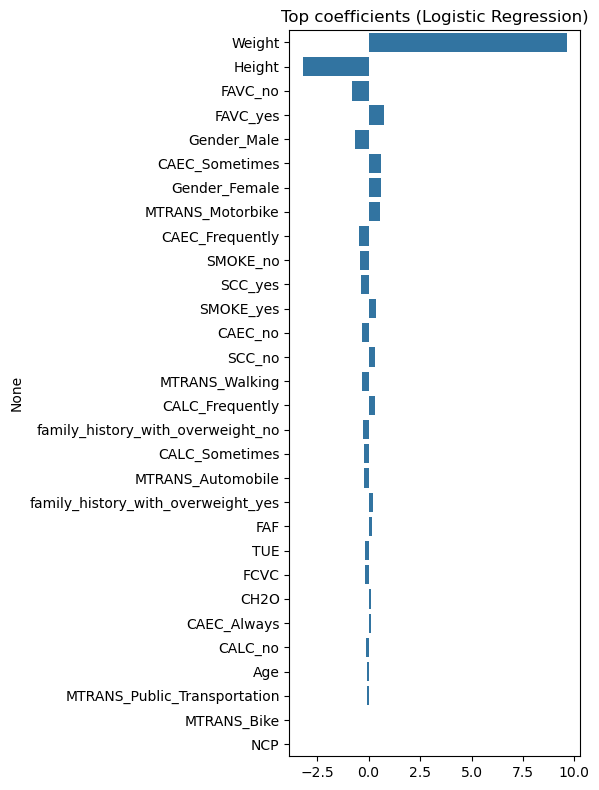

In [26]:
# Cell 18 — feature importance (after one-hot)
if best_model is pipe_rf:
    # extract feature names
    # numeric names
    feat_names = num_cols.copy()
    # one-hot names
    if cat_cols:
        ohe = best_model.named_steps['pre'].named_transformers_['cat'].named_steps['onehot']
        ohe_cols = list(ohe.get_feature_names_out(cat_cols))
    else:
        ohe_cols = []
    feature_names = feat_names + ohe_cols

    importances = best_model.named_steps['clf'].feature_importances_
    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(30)
    plt.figure(figsize=(6,8))
    sns.barplot(x=feat_imp.values, y=feat_imp.index)
    plt.title("Top feature importances (RF)")
    plt.tight_layout()
    plt.show()

    # print top features in dataframe for README
    top_features_df = feat_imp.reset_index()
    top_features_df.columns = ["feature", "importance"]
    top_features_df.head(15)
else:
    print("Best model is Logistic Regression — use coef_ for importance.")
    # for logistic, get coefficients
    coef = best_model.named_steps['clf'].coef_[0]
    # need feature names same as above
    if cat_cols:
        ohe = best_model.named_steps['pre'].named_transformers_['cat'].named_steps['onehot']
        ohe_cols = list(ohe.get_feature_names_out(cat_cols))
    else:
        ohe_cols = []
    feature_names = num_cols + ohe_cols
    coef_ser = pd.Series(coef, index=feature_names).sort_values(key=abs, ascending=False).head(30)
    plt.figure(figsize=(6,8))
    sns.barplot(x=coef_ser.values, y=coef_ser.index)
    plt.title("Top coefficients (Logistic Regression)")
    plt.tight_layout()
    plt.show()
    top_features_df = coef_ser.reset_index()
    top_features_df.columns = ["feature", "coef"]
    top_features_df.head(15)


In [27]:
# Cell 19 — save chosen pipeline and processed dataset
import joblib, os

os.makedirs("app", exist_ok=True)
joblib.dump(best_model, "app/model.pkl")
print("Saved model to app/model.pkl")

os.makedirs("data/processed", exist_ok=True)
# save df used for training (raw form)
df_model.to_csv("data/processed/df_model_for_training.csv", index=False)
print("Saved processed data to data/processed/df_model_for_training.csv")


Saved model to app/model.pkl
Saved processed data to data/processed/df_model_for_training.csv


In [30]:
# Cell 20 — quick summary table for README & presentation
from sklearn.metrics import precision_score, recall_score, f1_score

summary = {
    "model": ["LogisticRegression", "RandomForest"],
    "accuracy": [
        round(accuracy_score(y_test, pred_log),3),
        round(accuracy_score(y_test, pred_rf),3)
    ],
    "auc": [
        round(roc_auc_score(y_test, prob_log),3),
        round(roc_auc_score(y_test, prob_rf),3)
    ],
    "precision": [
        round(precision_score(y_test, pred_log, zero_division=0),3),
        round(precision_score(y_test, pred_rf, zero_division=0),3)
    ],
    "recall": [
        round(recall_score(y_test, pred_log, zero_division=0),3),
        round(recall_score(y_test, pred_rf, zero_division=0),3)
    ],
    "f1": [
        round(f1_score(y_test, pred_log, zero_division=0),3),
        round(f1_score(y_test, pred_rf, zero_division=0),3)
    ]
}

summary_df = pd.DataFrame(summary)
summary_df


,model,accuracy,auc,precision,recall,f1
0,LogisticRegression,0.991,1.000,0.99,0.990,0.990
1,RandomForest,0.986,0.999,0.99,0.979,0.985


In [3]:
import pandas as pd
import numpy as np
import joblib

# حمّلي الموديل
model = joblib.load("../app/model.pkl")
print("Loaded model:", type(model))
print("Classifier classes_:", model.named_steps['clf'].classes_)

# القيم التجريبية — 8 أمثلة
test_data = pd.DataFrame([
    [25,"Female",170,60,"no","no",3,2,"no","no",2,"no",2,1,"no","Walking"],
    [30,"Male",175,85,"no","yes",2,3,"no","yes",1,"yes",1,1,"sometimes","Automobile"],
    [45,"Female",160,95,"sometimes","yes",1,3,"no","no",2,"yes",0,2,"frequently","Automobile"],
    [20,"Male",180,65,"no","no",3,2,"no","no",3,"no",3,0,"no","Walking"],
    [50,"Male",165,105,"frequently","yes",1,3,"yes","yes",1,"yes",0,2,"always","Motorbike"],
    [28,"Female",158,70,"no","yes",2,3,"no","no",2,"yes",1,1,"sometimes","Public_Transportation"],
    [35,"Male",172,78,"no","no",2,2,"no","no",3,"no",2,1,"no","Bike"],
    [70,"Female",155,90,"sometimes","yes",1,3,"yes","no",1,"yes",0,0,"frequently","No_transport"]
], columns=[
    "Age","Gender","Height","Weight",
    "CALC","FAVC","FCVC","NCP","SCC","SMOKE","CH2O",
    "family_history_with_overweight","FAF","TUE","CAEC","MTRANS"
])

print("\nTest data:")
display(test_data)

# طبّقي نفس preprocessing اللي يستخدمه الـ pipeline
probs = model.predict_proba(test_data)
preds = model.predict(test_data)

# نختار العمود الصحيح لاحتمال class=1
classes = list(model.named_steps['clf'].classes_)
idx1 = classes.index(1)
proba_1 = probs[:, idx1]

# ضيفي النتائج
test_data["obesity_prob"] = proba_1
test_data["obesity_pred"] = preds

print("\nPredictions:")
display(test_data)

    


Loaded model: <class 'sklearn.pipeline.Pipeline'>
Classifier classes_: [0 1]

Test data:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,25,Female,170,60,no,no,3,2,no,no,2,no,2,1,no,Walking
1,30,Male,175,85,no,yes,2,3,no,yes,1,yes,1,1,sometimes,Automobile
2,45,Female,160,95,sometimes,yes,1,3,no,no,2,yes,0,2,frequently,Automobile
3,20,Male,180,65,no,no,3,2,no,no,3,no,3,0,no,Walking
4,50,Male,165,105,frequently,yes,1,3,yes,yes,1,yes,0,2,always,Motorbike
5,28,Female,158,70,no,yes,2,3,no,no,2,yes,1,1,sometimes,Public_Transportation
6,35,Male,172,78,no,no,2,2,no,no,3,no,2,1,no,Bike
7,70,Female,155,90,sometimes,yes,1,3,yes,no,1,yes,0,0,frequently,No_transport



Predictions:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,obesity_prob,obesity_pred
0,25,Female,170,60,no,no,3,2,no,no,2,no,2,1,no,Walking,0.0,0
1,30,Male,175,85,no,yes,2,3,no,yes,1,yes,1,1,sometimes,Automobile,0.0,0
2,45,Female,160,95,sometimes,yes,1,3,no,no,2,yes,0,2,frequently,Automobile,0.0,0
3,20,Male,180,65,no,no,3,2,no,no,3,no,3,0,no,Walking,0.0,0
4,50,Male,165,105,frequently,yes,1,3,yes,yes,1,yes,0,2,always,Motorbike,0.0,0
5,28,Female,158,70,no,yes,2,3,no,no,2,yes,1,1,sometimes,Public_Transportation,0.0,0
6,35,Male,172,78,no,no,2,2,no,no,3,no,2,1,no,Bike,0.0,0
7,70,Female,155,90,sometimes,yes,1,3,yes,no,1,yes,0,0,frequently,No_transport,0.0,0


In [7]:
import pandas as pd, numpy as np, joblib
model = joblib.load("../app/model.pkl")
print("Model loaded. classifier classes_:", model.named_steps['clf'].classes_)

# لو عندك ملف CSV المستخدم للـ batch، غيّري المسار هنا، أو استخدمي نفس df_upload الذي رفعتيه.
csv_path = r"C:\Users\heba9\OneDrive\Desktop\predictions.csv"  # أو المسار اللي استخدمتيه
df = pd.read_csv(csv_path)
print("CSV shape:", df.shape)
print("Columns:", df.columns.tolist())

training_features = [
    "Age","Gender","Height","Weight",
    "CALC","FAVC","FCVC","NCP","SCC","SMOKE","CH2O",
    "family_history_with_overweight","FAF","TUE","CAEC","MTRANS"
]

# أظهر أول صفوف من الأعمدة المستخدمة
print("\nPrepared head (first 5) for training_features:")
display(df[training_features].head())

# 1) قيم فريدة للأعمدة الفئوية المهمة
cats = ["CALC","CAEC","FAVC","SCC","SMOKE","family_history_with_overweight","MTRANS","Gender"]
for c in cats:
    if c in df.columns:
        print(f"\nUnique values in {c}: {df[c].astype(str).unique()}")

# 2) نفذ normalization كما في app.py (same mapping)
def normalize_df_categories(df_local):
    df2 = df_local.copy()
    if "CALC" in df2.columns:
        df2["CALC"] = df2["CALC"].astype(str).str.strip().str.lower().map({
            "no":"no","sometimes":"Sometimes","frequently":"Frequently"
        }).fillna(df2["CALC"])
    if "CAEC" in df2.columns:
        df2["CAEC"] = df2["CAEC"].astype(str).str.strip().str.lower().map({
            "no":"no","sometimes":"Sometimes","frequently":"Frequently","always":"Always"
        }).fillna(df2["CAEC"])
    return df2

X_norm = normalize_df_categories(df.copy())
print("\nAfter normalization (head):")
display(X_norm[training_features].head())

# 3) Transform first row with preprocessor to see numeric vector passed to classifier
pre = model.named_steps.get('pre', None)
if pre is None:
    print("No preprocessor found in pipeline.")
else:
    X_first = X_norm[training_features].iloc[:1]
    print("First row (as passed):")
    display(X_first)
    try:
        X_tr = pre.transform(X_first)
        print("Transformed shape:", getattr(X_tr, 'shape', None))
        try:
            arr = X_tr.toarray()
        except:
            arr = np.array(X_tr)
        print("Transformed vector (first 40 values):", arr[0][:40])
    except Exception as e:
        print("Error transforming first row:", e)

# 4) call predict_proba on first 5 rows and show results
try:
    proba_all = model.predict_proba(X_norm[training_features].iloc[:5])
    print("\npredict_proba shape:", proba_all.shape)
    print("predict_proba (first 5 rows):")
    print(proba_all)
    # map to class=1 index
    classes = list(model.named_steps['clf'].classes_)
    print("classes:", classes)
    if 1 in classes:
        idx1 = classes.index(1)
        print("index of class 1:", idx1)
        print("probs for class1:", proba_all[:, idx1])
    else:
        print("class 1 not in classes_")
except Exception as e:
    print("predict_proba failed:", e)


Model loaded. classifier classes_: [0 1]
CSV shape: (8, 19)
Columns: ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS', 'BMI', 'obesity_prob', 'obesity_pred']

Prepared head (first 5) for training_features:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,25,Female,170,60,no,no,3,2,no,no,2,no,2,1,no,Walking
1,30,Male,175,85,no,yes,2,3,no,yes,1,yes,1,1,sometimes,Automobile
2,45,Female,160,95,sometimes,yes,1,3,no,no,2,yes,0,2,frequently,Automobile
3,20,Male,180,65,no,no,3,2,no,no,3,no,3,0,no,Walking
4,50,Male,165,105,frequently,yes,1,3,yes,yes,1,yes,0,2,always,Motorbike



Unique values in CALC: ['no' 'sometimes' 'frequently']

Unique values in CAEC: ['no' 'sometimes' 'frequently' 'always']

Unique values in FAVC: ['no' 'yes']

Unique values in SCC: ['no' 'yes']

Unique values in SMOKE: ['no' 'yes']

Unique values in family_history_with_overweight: ['no' 'yes']

Unique values in MTRANS: ['Walking' 'Automobile' 'Motorbike' 'Public_Transportation' 'Bike'
 'No_transport']

Unique values in Gender: ['Female' 'Male']

After normalization (head):


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,25,Female,170,60,no,no,3,2,no,no,2,no,2,1,no,Walking
1,30,Male,175,85,no,yes,2,3,no,yes,1,yes,1,1,Sometimes,Automobile
2,45,Female,160,95,Sometimes,yes,1,3,no,no,2,yes,0,2,Frequently,Automobile
3,20,Male,180,65,no,no,3,2,no,no,3,no,3,0,no,Walking
4,50,Male,165,105,Frequently,yes,1,3,yes,yes,1,yes,0,2,Always,Motorbike


First row (as passed):


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,25,Female,170,60,no,no,3,2,no,no,2,no,2,1,no,Walking


Transformed shape: (1, 30)
Transformed vector (first 40 values): [ 1.00189821e-01  1.77389691e+03 -1.00356113e+00  1.08105776e+00
 -8.64742200e-01 -1.18145130e-02  1.17399704e+00  5.87453378e-01
  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.00000000e+00]

predict_proba shape: (5, 2)
predict_proba (first 5 rows):
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
classes: [0, 1]
index of class 1: 1
probs for class1: [0. 0. 0. 0. 0.]


In [9]:
# run this in notebook or save as test_predict.py and run: python test_predict.py
import joblib, pandas as pd, numpy as np
from pprint import pprint

model = joblib.load("../app/model.pkl")
print("Model loaded. classifier classes_:", model.named_steps['clf'].classes_)

# training features (same order as app)
training_features = [
    "Age","Gender","Height","Weight",
    "CALC","FAVC","FCVC","NCP","SCC","SMOKE","CH2O",
    "family_history_with_overweight","FAF","TUE","CAEC","MTRANS"
]

# sample row like UI (obese example)
row = {
    "Age":45,
    "Gender":"Female",
    "Height":160,
    "Weight":95,
    "CALC":"sometimes",
    "FAVC":"yes",
    "FCVC":1,
    "NCP":3,
    "SCC":"no",
    "SMOKE":"no",
    "CH2O":2,
    "family_history_with_overweight":"yes",
    "FAF":0,
    "TUE":2,
    "CAEC":"frequently",
    "MTRANS":"Automobile"
}

def normalize_categories_local(user_input):
    mapping = {
        "CALC": {"no":"no","sometimes":"Sometimes","frequently":"Frequently"},
        "CAEC": {"no":"no","sometimes":"Sometimes","frequently":"Frequently","always":"Always"},
        "FAVC": {"no":"no","yes":"yes"},
        "SCC": {"no":"no","yes":"yes"},
        "SMOKE": {"no":"no","yes":"yes"},
        "family_history_with_overweight": {"no":"no","yes":"yes"},
        "Gender": {"female":"Female","male":"Male"},
        "MTRANS": {
            "automobile":"Automobile","walking":"Walking",
            "public_transportation":"Public_Transportation","public transportation":"Public_Transportation",
            "bike":"Bike","motorbike":"Motorbike","no_transport":"No_transport","notransport":"No_transport"
        }
    }
    for col,m in mapping.items():
        if col in user_input:
            v = str(user_input[col]).strip().lower()
            if v in m:
                user_input[col] = m[v]
    return user_input

print("\nRow before normalization:")
pprint(row)
row_norm = normalize_categories_local(row.copy())
print("\nRow after normalization (what should go to model):")
pprint(row_norm)

# Build DataFrame aligned to training_features
df = pd.DataFrame([row_norm])
for c in training_features:
    if c not in df.columns:
        df[c] = np.nan
df = df[training_features]
print("\nDataFrame passed to model (dtypes):")
print(df.head().to_dict(orient='records'))

# Try transform through preprocessor
pre = model.named_steps.get('pre', None)
if pre is None:
    print("\nNO preprocessor in pipeline (unexpected).")
else:
    try:
        X_tr = pre.transform(df)
        print("\nTransformed vector shape:", getattr(X_tr,'shape', None))
        try:
            arr = X_tr.toarray()
        except:
            arr = np.array(X_tr)
        nonzeros = np.count_nonzero(arr)
        print("Number of nonzero elements in transformed vector:", nonzeros)
        print("First 60 values of transformed vector (truncated):")
        print(arr[0][:60])
    except Exception as e:
        print("Transform failed:", e)

# predict_proba & predict
try:
    proba_all = model.predict_proba(df)
    print("\npredict_proba shape:", proba_all.shape)
    print("predict_proba (all classes):", proba_all)
    classes = list(model.named_steps['clf'].classes_)
    print("classes:", classes)
    if 1 in classes:
        idx1 = classes.index(1)
        print("index for class 1:", idx1)
        print("proba for class 1:", proba_all[:, idx1])
    else:
        print("class 1 not present in classes_")
    preds = model.predict(df)
    print("model.predict:", preds)
except Exception as e:
    print("predict failed:", e)


Model loaded. classifier classes_: [0 1]

Row before normalization:
{'Age': 45,
 'CAEC': 'frequently',
 'CALC': 'sometimes',
 'CH2O': 2,
 'FAF': 0,
 'FAVC': 'yes',
 'FCVC': 1,
 'Gender': 'Female',
 'Height': 160,
 'MTRANS': 'Automobile',
 'NCP': 3,
 'SCC': 'no',
 'SMOKE': 'no',
 'TUE': 2,
 'Weight': 95,
 'family_history_with_overweight': 'yes'}

Row after normalization (what should go to model):
{'Age': 45,
 'CAEC': 'Frequently',
 'CALC': 'Sometimes',
 'CH2O': 2,
 'FAF': 0,
 'FAVC': 'yes',
 'FCVC': 1,
 'Gender': 'Female',
 'Height': 160,
 'MTRANS': 'Automobile',
 'NCP': 3,
 'SCC': 'no',
 'SMOKE': 'no',
 'TUE': 2,
 'Weight': 95,
 'family_history_with_overweight': 'yes'}

DataFrame passed to model (dtypes):
[{'Age': 45, 'Gender': 'Female', 'Height': 160, 'Weight': 95, 'CALC': 'Sometimes', 'FAVC': 'yes', 'FCVC': 1, 'NCP': 3, 'SCC': 'no', 'SMOKE': 'no', 'CH2O': 2, 'family_history_with_overweight': 'yes', 'FAF': 0, 'TUE': 2, 'CAEC': 'Frequently', 'MTRANS': 'Automobile'}]

Transformed vector